<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Experiment (VIII): The Vertical Structure of the Milky Way’s Galactic Disk__


## Derivation of the Relationship Between Slope and Scale Height

The stellar density in the thin disk follows an exponential form:

$$    \rho(z) = e^{-z / h_z}
$$
where:
- $ \rho(z) $ is the stellar density at height $ z $,
- $ h_z $ is the scale height.

Taking the base-10 logarithm:

$$    \log_{10} \rho(z) = \log_{10} \left( e^{-z / h_z} \right)
$$
Using logarithm properties:

$$    \log_{10} \rho(z) =  \log_{10} e^{-z / h_z}
$$
Since $ \log_{10} e^x = x \log_{10} e $, we substitute:

$$    \log_{10} \rho(z) = - \frac{z}{h_z} \log_{10} e
$$
This is in the form of a straight line:

$$    Y = B + mX
$$

Thus, the slope of the line in a plot of $ \log_{10} \rho $ vs. $ z $ is:

$$    m = -\frac{\log_{10} e}{h_z}
$$
Solving for $ h_z $:

$$    h_z = -\frac{\log_{10} e}{m}
$$
Since $ \log_{10} e \approx 0.4343 $, we get:

$$    h_z = -\frac{0.4343}{m}
$$
Thus, the scale height $ h_z $ can be determined from the slope of the linear fit.


In [3]:
# Importing Main Librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib . colors import LogNorm
import seaborn as sns
from scipy.stats import linregress
from astropy.table import Table
import astropy.units as u

In [4]:
# Introducing the Data
filename = "Gaia_NSGP.fits"
gaia_data = Table.read(filename)
gaia_data.info()

<Table length=272432>
      name       dtype  unit      description         class    
--------------- ------- ---- --------------------- ------------
             ra float64  deg       Right ascension       Column
            dec float64  deg           Declination       Column
       parallax float64  mas              Parallax       Column
phot_g_mean_mag float32  mag G-band mean magnitude       Column
          bp_rp float32  mag        BP - RP colour       Column
              l float64  deg                             Column
              b float64  deg                             Column
      star_type   int64                            MaskedColumn


In [5]:
#display table
gaia_data[0:6]

ra,dec,parallax,phot_g_mean_mag,bp_rp,l,b,star_type
deg,deg,mas,mag,mag,deg,deg,
float64,float64,float64,float32,float32,float64,float64,int64
10.356289480915295,-22.35228052990055,109.87941245212957,14.307448,0.9131489,96.94250425693707,-84.71101584455872,3
197.96440806327234,27.8819827644651,108.89509781046185,4.023946,0.75565386,43.5561195302298,85.41015049827271,1
16.230033594507695,-18.122516754425735,102.32238159518654,12.712725,3.4293814,142.66393283352392,-80.4736251874781,1
189.11742070725003,35.199731619699165,84.01115848187301,12.257576,3.0634117,143.62300519044854,81.3186833969582,1
14.622722876386014,-27.858343459391044,83.51813239160565,10.565316,2.653633,238.35913523463648,-88.27391191152742,1
185.3604031132226,30.642694671469222,83.30837708479658,13.457203,3.5264578,182.9981017057479,82.55522838612319,1


## Task 1:

### part (a): 

### 1) Distance (in parsecs):

$$
distance (pc) = {1000}​/{parallax (mas) }
$$

In [9]:
# Avoid division by zero or negative parallaxes (which are non-physical)
valid_parallax = gaia_data['parallax'] > 0
distance_pc = np.full(len(gaia_data), np.nan)  # Initialize with NaNs
distance_pc[valid_parallax] = 1000 / gaia_data['parallax'][valid_parallax]

# Add the column with a unit
gaia_data['distance_pc'] = distance_pc * u.pc  # Assign unit of parsecs
gaia_data[['distance_pc']][:6] 

distance_pc
pc
float64
9.100885941082579
9.18314983967926
9.773032883032915
11.903180697309022
11.973447817428797
12.003594776334873


### 2) Absolute magnitude (MG):
$$ M_G​ = m_G​ − 5 log_{10}(​d) + 5 $$

In [11]:
# Ensure we use valid distances (avoid NaNs and infinities)
valid_distance = np.isfinite(gaia_data['distance_pc']) & (gaia_data['distance_pc'] > 0)

# Initialize absolute magnitude with NaNs
MG = np.full(len(gaia_data), np.nan)

# Compute absolute magnitude where distances are valid
MG[valid_distance] = gaia_data['phot_g_mean_mag'][valid_distance] - 5 * np.log10(gaia_data['distance_pc'][valid_distance]) + 5

# Add the column with a unit
gaia_data['MG'] = MG * u.mag  # Assign unit of magnitudes
gaia_data[['MG']][0:6]

MG
mag
float64
14.512030029609031
4.208987455041402
12.762577885516581
11.879260856296728
10.174220071250307
13.060646282083132


### 3) Plotting __(CMD)__: 
#### Brightness vs Stellar temperature proxy:

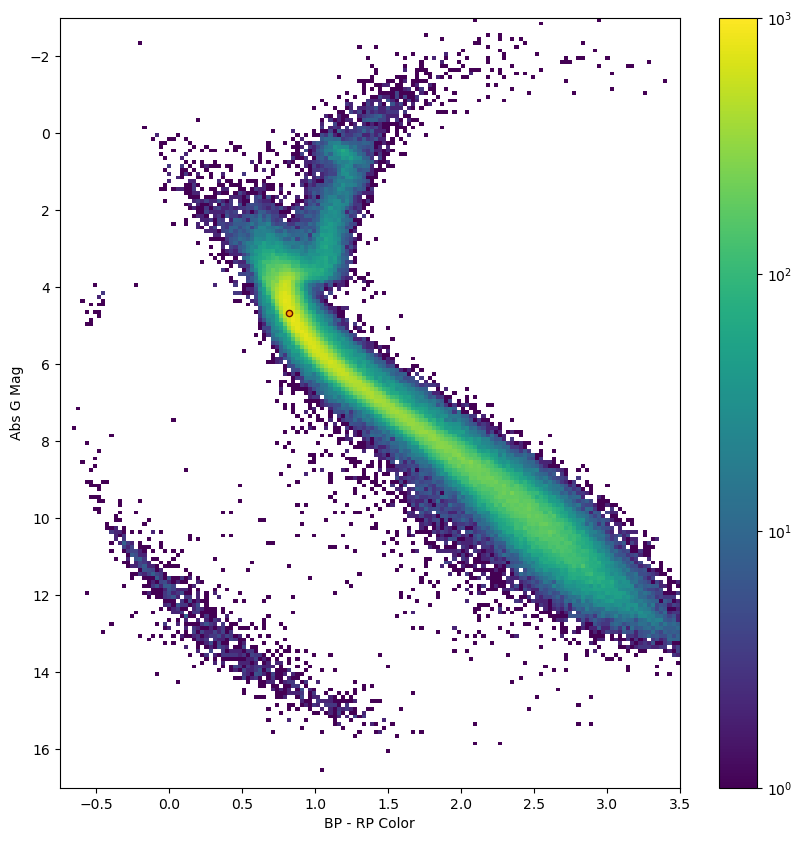

In [13]:
# Define bin edges for a 2D histogram in the color-magnitude diagram (CMD)
cmd_res = (np.linspace(-0.75, 3.5, 151), np.linspace(-3, 17, 201))

# Create a figure with specified size
fig = plt.figure(figsize=(10, 10))

# Add a subplot (single plot in this case)
ax = fig.add_subplot(111)

# Create a 2D histogram (color-magnitude diagram)
h = ax.hist2d(
    gaia_data['bp_rp'],  # X-axis: BP - RP color index (stellar temperature proxy)
    gaia_data['MG'],  # Y-axis: Absolute G-band magnitude (brightness)
    bins=cmd_res,  # Bin edges for histogram
    norm=LogNorm(1.0, 1e3)  # Logarithmic color scaling (for better contrast)
)

# Add a colorbar to indicate density of points
cb = fig.colorbar(h[3])
cb.ax.minorticks_off()  # Disable minor ticks on colorbar

# Invert the Y-axis since brighter magnitudes are lower values
ax.invert_yaxis()

# Set labels for axes
ax.set_xlabel('BP - RP Color')  # X-axis: Color index
ax.set_ylabel('Abs G Mag')  # Y-axis: Absolute magnitude

# Set Y-axis ticks at intervals of 2 magnitudes
ax.set_yticks(np.arange(-2, 18, 2))

# Highlight a specific point on the CMD (e.g., a reference star)
ax.scatter(
    0.82, 4.67,  # Coordinates (BP-RP color, Absolute magnitude)
    color='orange', edgecolor='#661100',  # Point color and edge color
    s=20,  # Point size
    lw=1  # Line width of edge
)

# Show the plot
plt.show()

## Task 2:

### Red Clump stars:
- They are in a cluster of metal-rich, hot red giants.
- Their absolute magnitude would be via statistical approaches

#### Absolute magnitude Via Histogram Approach:
- Counts how many stars fall into bins of absolute magnitude (MG) and identifies the bin with the highest count (density peak).

Estimated Red Clump Center Absolute Magnitude: 5.59


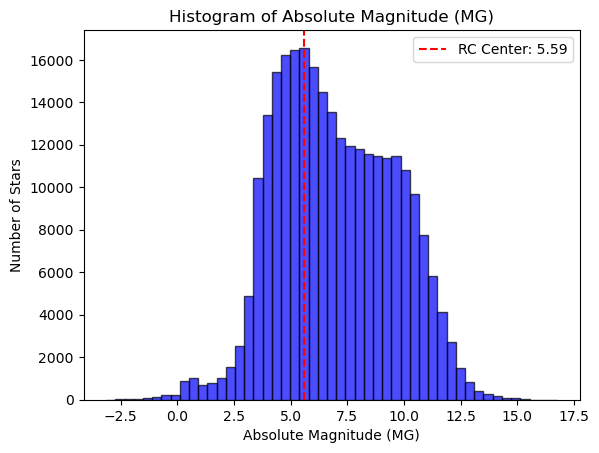

In [17]:
# Define bins for absolute magnitude histogram
bins = np.linspace(min(MG), max(MG), 50)

# Plot histogram of MG values to find peak density
plt.hist(MG, bins=bins, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Absolute Magnitude (MG)")
plt.ylabel("Number of Stars")
plt.title("Histogram of Absolute Magnitude (MG)")

# Find the peak bin (most frequent MG value)
hist, bin_edges = np.histogram(MG, bins=bins)
peak_bin_index = np.argmax(hist)  # Index of the highest density bin
MG_clump_center = (bin_edges[peak_bin_index] + bin_edges[peak_bin_index + 1]) / 2  # Center of peak bin

print(f"Estimated Red Clump Center Absolute Magnitude: {MG_clump_center:.2f}")
plt.axvline(MG_clump_center, color='red', linestyle='dashed', label=f"RC Center: {MG_clump_center:.2f}")
plt.legend()
plt.show()


#### Absolute magnitude Via Kernel Density Estimation (KDE) Approach:
- Estimates the probability density function (PDF) of (MG) using a Gaussian smoothing function and finds the peak.
- More accurate than Histogram

Estimated Red Clump Center (KDE): 5.36


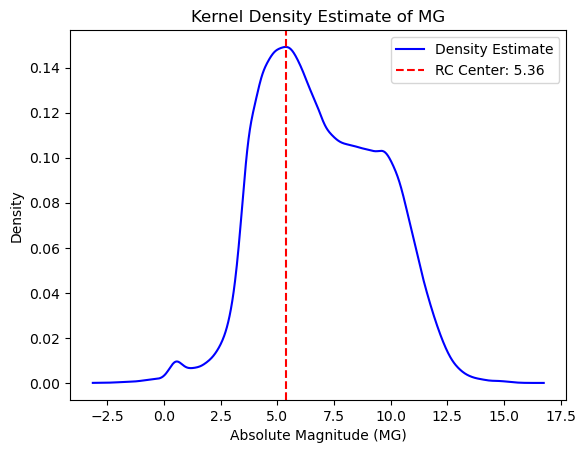

In [19]:
from scipy.stats import gaussian_kde

# KDE estimation
kde = gaussian_kde(MG)
MG_range = np.linspace(min(MG), max(MG), 1000)
density = kde(MG_range)

# Find peak in KDE
MG_clump_center = MG_range[np.argmax(density)]

print(f"Estimated Red Clump Center (KDE): {MG_clump_center:.2f}")

# Plot KDE
plt.plot(MG_range, density, color='blue', label='Density Estimate')
plt.axvline(MG_clump_center, color='red', linestyle='dashed', label=f"RC Center: {MG_clump_center:.2f}")
plt.xlabel("Absolute Magnitude (MG)")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of MG")
plt.legend()
plt.show()

#### Sampling Main-sequence stars & stars in Red clump:

In [21]:
# Define stellar samples using boolean indexing
ms_stars = gaia_data[gaia_data['MG'] > 4]  # Main-sequence stars

# Define the selection range (±0.5 mag around the clump center)
MG_lower = MG_clump_center - 0.5
MG_upper = MG_clump_center + 0.5

# Select stars within this range
red_clump_sample = gaia_data[(gaia_data['MG'] >= MG_lower) & (gaia_data['MG'] <= MG_upper)]

# Print the number of selected Red Clump stars
print(f"Number of Red Clump stars selected: {len(red_clump_sample)}")


Number of Red Clump stars selected: 40499


#### simple CMD for Red Clump stars

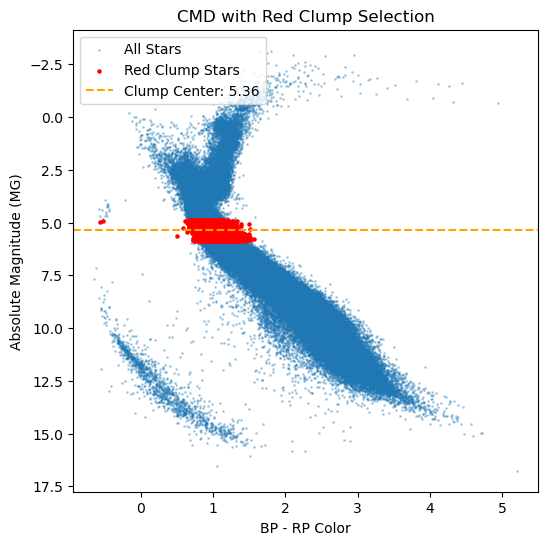

In [23]:
# Plot full CMD
plt.figure(figsize=(6,6))
plt.scatter(gaia_data['bp_rp'], gaia_data['MG'], s=1, alpha=0.3, label="All Stars")

# Highlight Red Clump Stars
plt.scatter(red_clump_sample['bp_rp'], red_clump_sample['MG'], s=5, color='red', label="Red Clump Stars")

# Plot reference line for clump center
plt.axhline(y=MG_clump_center, color='orange', linestyle='dashed', label=f"Clump Center: {MG_clump_center:.2f}")

plt.xlabel("BP - RP Color")
plt.ylabel("Absolute Magnitude (MG)")
plt.gca().invert_yaxis()  # Brighter stars (lower MG) should be at the top

# legend settings
plt.legend(loc="upper left", markerscale=1)  # Fix location & scale markers

plt.title("CMD with Red Clump Selection")
plt.show()

#### The Full CMD plotting

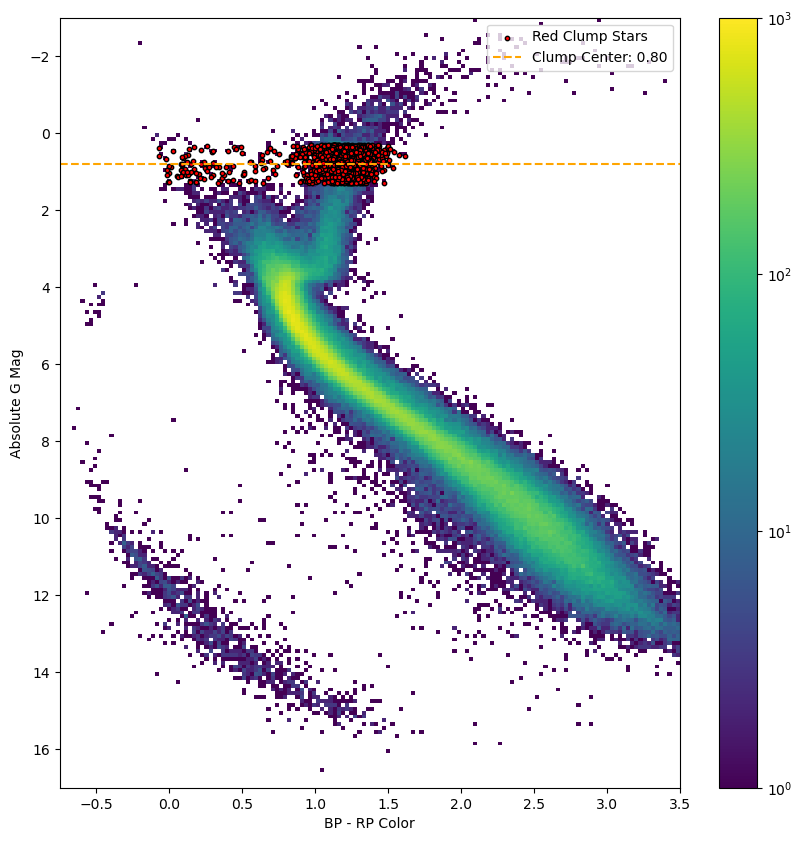

In [25]:
# Define bin edges for the 2D histogram (CMD resolution)
cmd_res = (np.linspace(-0.75, 3.5, 151), np.linspace(-3, 17, 201))

# Create a figure and axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# Create a 2D histogram (color-magnitude diagram)
h = ax.hist2d(
    gaia_data['bp_rp'],  # X-axis: BP - RP color index
    gaia_data['MG'],  # Y-axis: Absolute G-band magnitude
    bins=cmd_res,  # Bin edges
    norm=LogNorm(1.0, 1e3)  # Logarithmic color scaling for better contrast
)

# Add a colorbar to indicate density of points
cb = fig.colorbar(h[3])
cb.ax.minorticks_off()  # Disable minor ticks on colorbar

# Invert the Y-axis (brighter magnitudes = lower values)
ax.invert_yaxis()

# Set labels for axes
ax.set_xlabel('BP - RP Color')  # X-axis: Color index
ax.set_ylabel('Absolute G Mag')  # Y-axis: Absolute magnitude

# Set Y-axis ticks at intervals of 2 magnitudes
ax.set_yticks(np.arange(-2, 18, 2))

# Approximate the Red Clump center from the CMD
MG_clump_center = 0.8  # Adjust based on the actual plot

# Define the selection range for Red Clump stars (±0.5 mag around the clump center)
MG_lower = MG_clump_center - 0.5
MG_upper = MG_clump_center + 0.5

# Select Red Clump stars
red_clump_sample = gaia_data[(gaia_data['MG'] >= MG_lower) & (gaia_data['MG'] <= MG_upper)]

# Overlay Red Clump stars in red
ax.scatter(
    red_clump_sample['bp_rp'], red_clump_sample['MG'], 
    color='red', edgecolor='black', s=10, label="Red Clump Stars"
)

# Plot reference line for the Red Clump center
ax.axhline(y=MG_clump_center, color='orange', linestyle='dashed', label=f"Clump Center: {MG_clump_center:.2f}")

# Add legend
ax.legend()

# Show the plot
plt.show()

In [26]:
# function for the code snippet (Explained via comments)
def compute_stellar_density(distances, bins=100, distance_range=[0, 4000]):
    """
    Computes log stellar density and bin centers.

    Parameters:
        distances (array-like): Array of star distances in parsecs.
        bins (int, optional): Number of bins for the histogram.
        distance_range (list, optional): Min and max distance for binning.

    Returns:
        bincent (array): Centers of the bins.
        logdens (array): Log stellar density values.
    """
    # Remove NaN and zero values
    distances = distances[np.isfinite(distances) & (distances > 0)]
    
    # Compute histogram (star count per bin)
    N, edges = np.histogram(distances, bins=bins, range=distance_range)
    
    # Compute volume elements for spherical shells
    vol = (4 * np.pi / 3) * edges ** 3
    dvol = np.diff(vol)
    
    # Avoid log(0) errors by filtering out zero values
    valid = (N > 0) & (dvol > 0)
    
    # Compute log density only for valid bins
    logdens = np.log10(N[valid] / dvol[valid])
    
    # Compute bin centers
    bincent = 0.5 * (edges[1:] + edges[:-1])[valid]
    
    return bincent, logdens


#### Fitting the data and Plotting Functions

In [28]:
# function for the linear fitting
def fit_stellar_density(bincent, logdens, fit_range=1000):
    """
    Fits a straight line to log stellar density vs. distance for bins ≤ fit_range.

    Parameters:
        bincent (array): Centers of the bins.
        logdens (array): Log stellar density values.
        fit_range (float, optional): Maximum distance for fitting (default: 1000 pc).

    Returns:
        (m, b): Slope and intercept of the fitted line.
    """
    # Mask to fit only bins ≤ fit_range
    mask_fit = bincent <= fit_range
    if np.any(mask_fit):
        # Perform linear fit: logdens = m * bincent + b
        m, b = np.polyfit(bincent[mask_fit], logdens[mask_fit], 1)
        return m, b
    else:
        return None, None


#### Computing the thin disk scale height


MS Stars Linear Fit:
log density = (-0.0023) * distance + (-2.8866)
Thin Disk Scale Height using MS Stars: h_z = 190.21 pc

Red Clump Stars Linear Fit:
log density = (-0.0016) * distance + (-5.5876)
Thin Disk Scale Height using Red Clump Stars: h_z = 273.63 pc


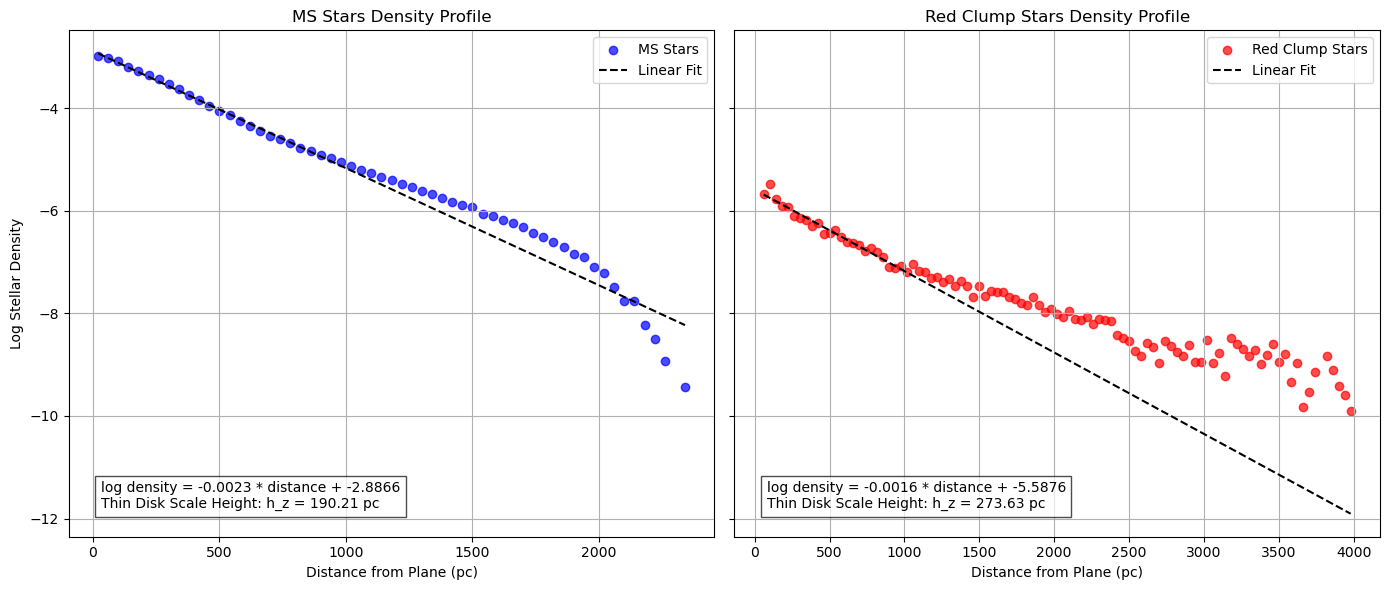

In [30]:
# Create subplots: one row, two columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, distances, label, color in zip(
    axes,
    [ms_stars['distance_pc'], red_clump_sample['distance_pc']],
    ["MS Stars", "Red Clump Stars"],
    ["blue", "red"]
):
    bincent, logdens = compute_stellar_density(distances)
    
    # Scatter plot
    ax.scatter(bincent, logdens, color=color, label=label, alpha=0.7)
    
    # Fit straight line
    m, b = fit_stellar_density(bincent, logdens)
    if m is not None:
        fit_line = m * bincent + b
        ax.plot(bincent, fit_line, color="black", linestyle='dashed', label="Linear Fit")
        
        # Compute thin disk scale height
        hz = -1 / (m * np.log(10))
         # Annotate fit equation and h_z on the plot
        equation_text = f"log density = {m:.4f} * distance + {b:.4f}\nThin Disk Scale Height: h_z = {hz:.2f} pc"
        ax.text(0.05, 0.05, equation_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.7))
        
        # Print results separately
        print(f"\n{label} Linear Fit:")
        print(f"log density = ({m:.4f}) * distance + ({b:.4f})")
        print(f"Thin Disk Scale Height using {label}: h_z = {hz:.2f} pc")

    # Labels and title
    ax.set_xlabel("Distance from Plane (pc)")
    ax.set_title(f"{label} Density Profile")
    ax.legend()
    ax.grid(True)

# Shared y-label
axes[0].set_ylabel("Log Stellar Density")

# Adjust layout
plt.tight_layout()
plt.show()

---
#### Discussion over Height values:
- Thin Disk Scale Height using MS Stars: $h_z$ = 190.21 pc
- Thin Disk Scale Height using Red Clump Stars : $h_z$ = 273.63 pc
- Thin Disk Scale Height Using Gaia DR3: $h_Z$ = 279.76 ± 12.49 pc

In [32]:
# values
hz_ms = 190.21  # Thin Disk Scale Height from MS Stars
hz_rc = 273.63  # Thin Disk Scale Height from Red Clump Stars
hz_gaia = 279.76  # Thin Disk Scale Height from Gaia DR3

# Compute relative errors
relative_error_ms = abs((hz_ms - hz_gaia) / hz_gaia) * 100
relative_error_rc = abs((hz_rc - hz_gaia) / hz_gaia) * 100

print(f"Relative Error (from MS Stars) = {relative_error_ms:.2f}%")
print(f"Relative Error (from Red Clump Stars) = {relative_error_rc:.2f}%")

Relative Error (from MS Stars) = 32.01%
Relative Error (from Red Clump Stars) = 2.19%


- Therefore, The Red Clump (RC) stars provide a much better estimate for the thin disk scale height compared to the Main Sequence (MS) stars.

Due to:
1. __Luminosity Spread and Distance Bias__

- Red Clump Stars: they have a narrow range of absolute magnitudes. Therefore, they are excellent distance indicators because their brightness is well known leading to reduction in uncertainties in distance estimates.
- Main Sequence Stars: They cover a much wider range of luminosities. Therefore, This large spread makes it harder to accurately determine distances, leading to a bias in the number of stars observed at different distances.

2. __Fit Performance Across Distances__

- The fit works well for small distances (<1 kpc), where the density drop-off is dominated by the thin disk.
- At larger distances, deviations appear due to the thick disk and halo populations, which Gaia DR3 models account for, but our simple fit does not.
- The RC stars provide a more reliable estimate for the thin disk scale height because they are better distance indicators and suffer less from observational biases compared to MS stars.
-  The MS stars' wide luminosity range introduces uncertainties, making them less ideal for this measurement.

#### Differences Between the Fit and the Data

- The fit assumes a single exponential decrease, but the real density distribution is more complex.
- At large distances, the data points deviate from the fit due to the transition to the thick disk and halo stars.
- The MS sample has more scatter due to its luminosity spread, while the RC sample follows a smoother exponential trend, leading to a better fit.

## Refrences:
[1] K. Vieira, V. Korchagin, G. Carraro, and A. Lutsenko, “Vertical Structure of the Milky Way Disk with Gaia DR3,” Galaxies, vol. 11, no. 3, p. 77, Jun. 2023, doi: https://doi.org/10.3390/galaxies11030077.